## Import Library

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
data_path = os.path.join(os.getcwd(), "heart.csv")
data = pd.read_csv(data_path)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### Variable Description

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or - depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


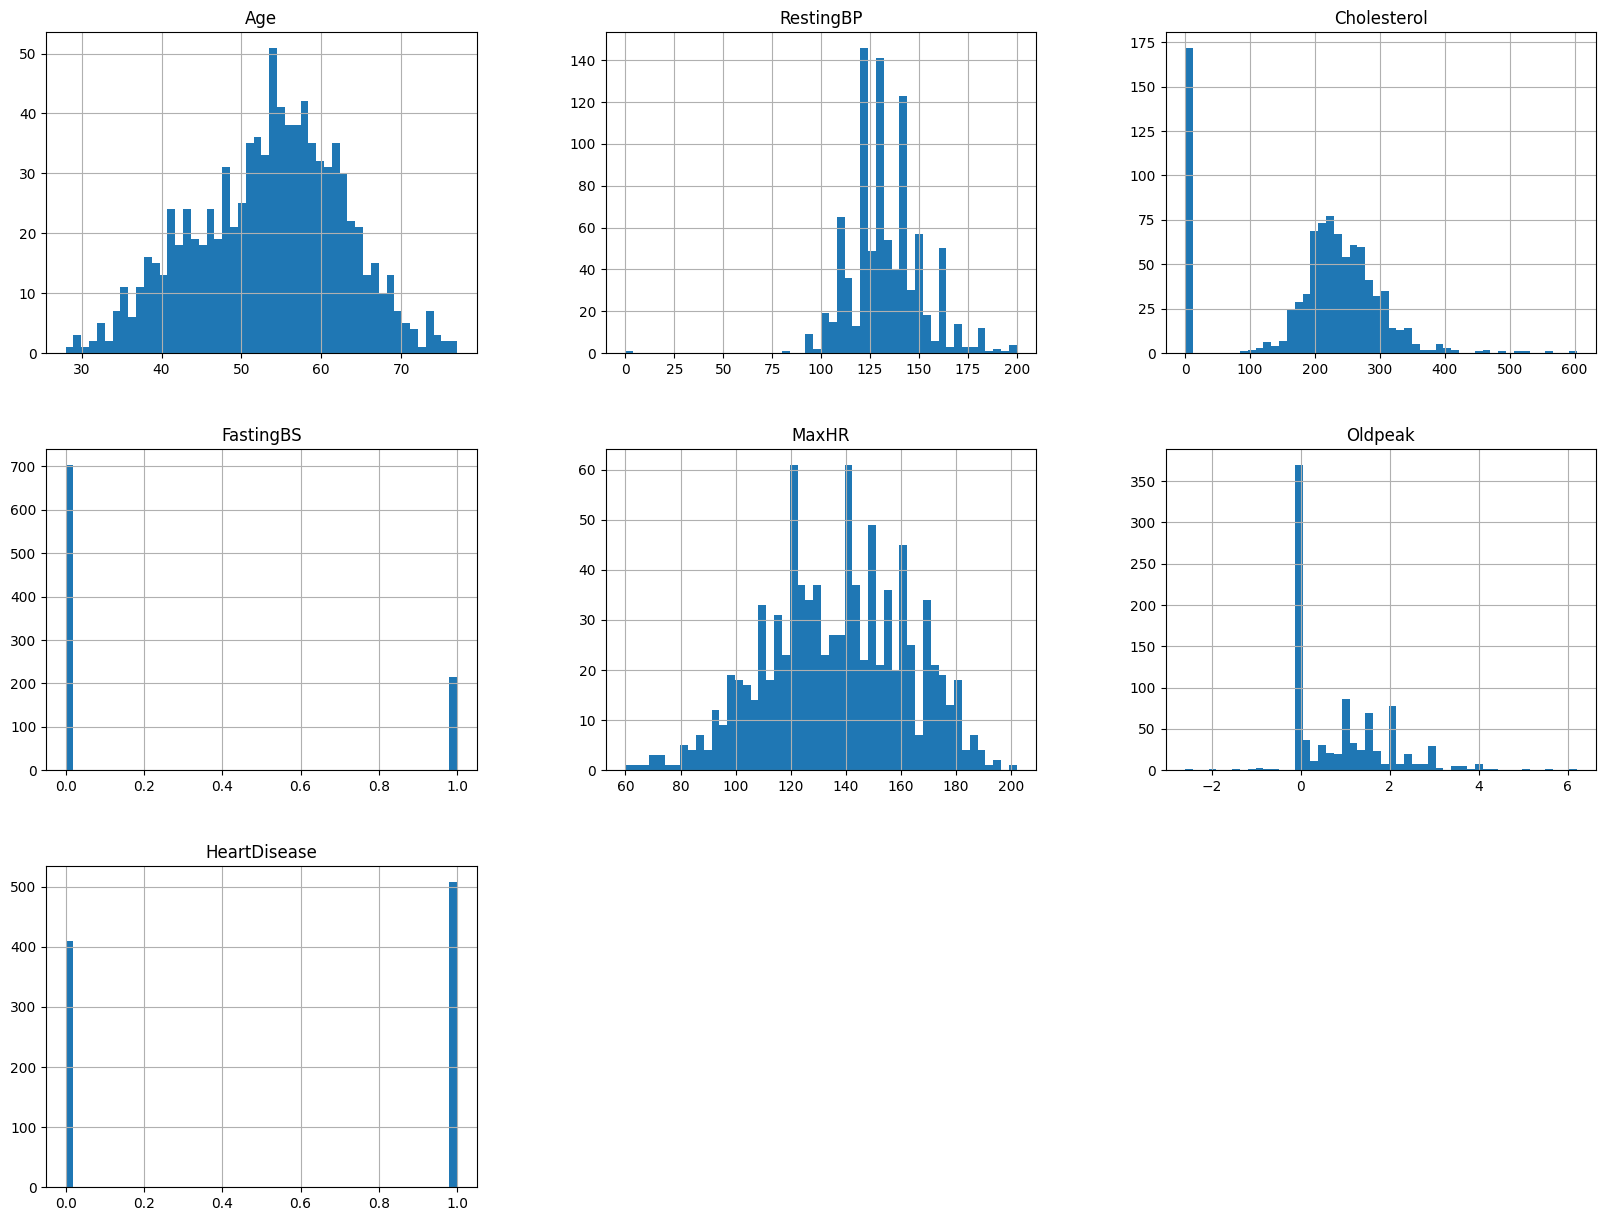

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

#### Dealing with Missing Values

Terdapat 2 kolom yang perlu diselidiki:
- Kolesterol adalah zat lemak yang ditemukan dalam tubuh manusia dan memiliki nilai yang berbeda-beda. Tidak mungkin bagi seseorang untuk memiliki nilai kolesterol yang tepat 0 dalam kondisi normal. 

- Nilai RestingBP seseorang tidak mungkin bernilai 0 karena tekanan darah minimal yang dibutuhkan untuk memompa darah ke seluruh tubuh adalah 60 mmHg. Namun, nilai RestingBP seseorang bisa bernilai sangat rendah dan di bawah normal seperti 90/60 mmHg atau bahkan lebih rendah.

In [7]:
Cholesterol = (data.Cholesterol == 0).sum()
RestingBP = (data.RestingBP == 0).sum()

print("Nilai 0 di kolom Cholesterol ada: ", Cholesterol)
print("Nilai 0 di kolom RestingBP ada: ", RestingBP)

Nilai 0 di kolom Cholesterol ada:  172
Nilai 0 di kolom RestingBP ada:  1


Terdapat 3 teknik yang populer untuk mengatasi hal ini yaitu Dropping, Imputation, dan Interpolation. Mengingat Jumlah dataset kita yang tidak terlalu besar, kita tidak boleh menggunakan teknik Dropping. Ini dikarenakan menghapus data akan membuat kita kehilangan informasi yang mungkin berkontribusi pada analisis atau model yang akan dibangun, terlebih lagi terdapat 172 baris yang bernilai 0 pada kolom kolesterol. Sedangkan Interpolation lebih dikhusukan untuk dataset bertipe time series karena Interpolation memiliki keuntungan dalam menjaga kontinuitas data. Oleh karena itu imputation adalah solusi yang tepat.

Dengan menggunakan metode imputasi, Kita dapat mencoba menggantikan nilai-nilai kolesterol yang bernilai 0 dengan nilai yang diestimasi berdasarkan data yang ada. Beberapa metode imputasi yang bisa kita pertimbangkan yaitu Imputasi Berdasarkan Mean, Median, atau Modus, Imputasi Regresi, dan Imputasi dengan KNN, dan Imputatsi Multiple Imputation. Begitu juga dengan nilai 0 pada RestingBP. Sebenarnya kita bisa melakukan dropping karena hanya terdapat 1 baris yang bernilai 0 pada kolom RestingBP. Namun kita tetap akan menggunakan teknik yang sama yaitu Imputation.

In [8]:
from sklearn.impute import KNNImputer
subset_data = data[['Cholesterol']]
subset_data['Cholesterol'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(subset_data)
data['Cholesterol'] = after_impute

/tmp/ipykernel_19525/1871076352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Cholesterol'].replace(0, np.nan, inplace=True)


In [9]:
from sklearn.impute import KNNImputer
subset_data = data[['RestingBP']]
subset_data['RestingBP'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(subset_data)
data['RestingBP'] = after_impute

/tmp/ipykernel_19525/2199066471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['RestingBP'].replace(0, np.nan, inplace=True)


In [10]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- heart_df['Cholesterol'].replace(0, np.nan, inplace=True): Di sini, saya mengganti semua nilai 0 dalam kolom "Cholesterol" dengan nilai NaN. Ini adalah langkah yang baik karena nilai 0 dalam konteks kolesterol tidak masuk akal dan lebih baik dianggap sebagai nilai yang hilang.

- imputer = KNNImputer(n_neighbors=3): saya membuat objek KNNImputer dari pustaka sklearn.impute dengan menentukan n_neighbors=3. Ini berarti saya akan menggunakan 3 tetangga terdekat untuk mengimputasi nilai yang hilang.

- after_impute = imputer.fit_transform(heart_df): saya menggunakan metode fit_transform pada objek imputer untuk mengisi nilai-nilai yang hilang dalam DataFrame heart_df menggunakan algoritma K-Nearest Neighbors.

- heart_df = pd.DataFrame(after_impute, columns=heart_df.columns): Setelah imputasi selesai, saya mengganti DataFrame asli heart_df dengan hasil imputasi yang telah diubah tipe data menjadi DataFrame lagi.

In [11]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']

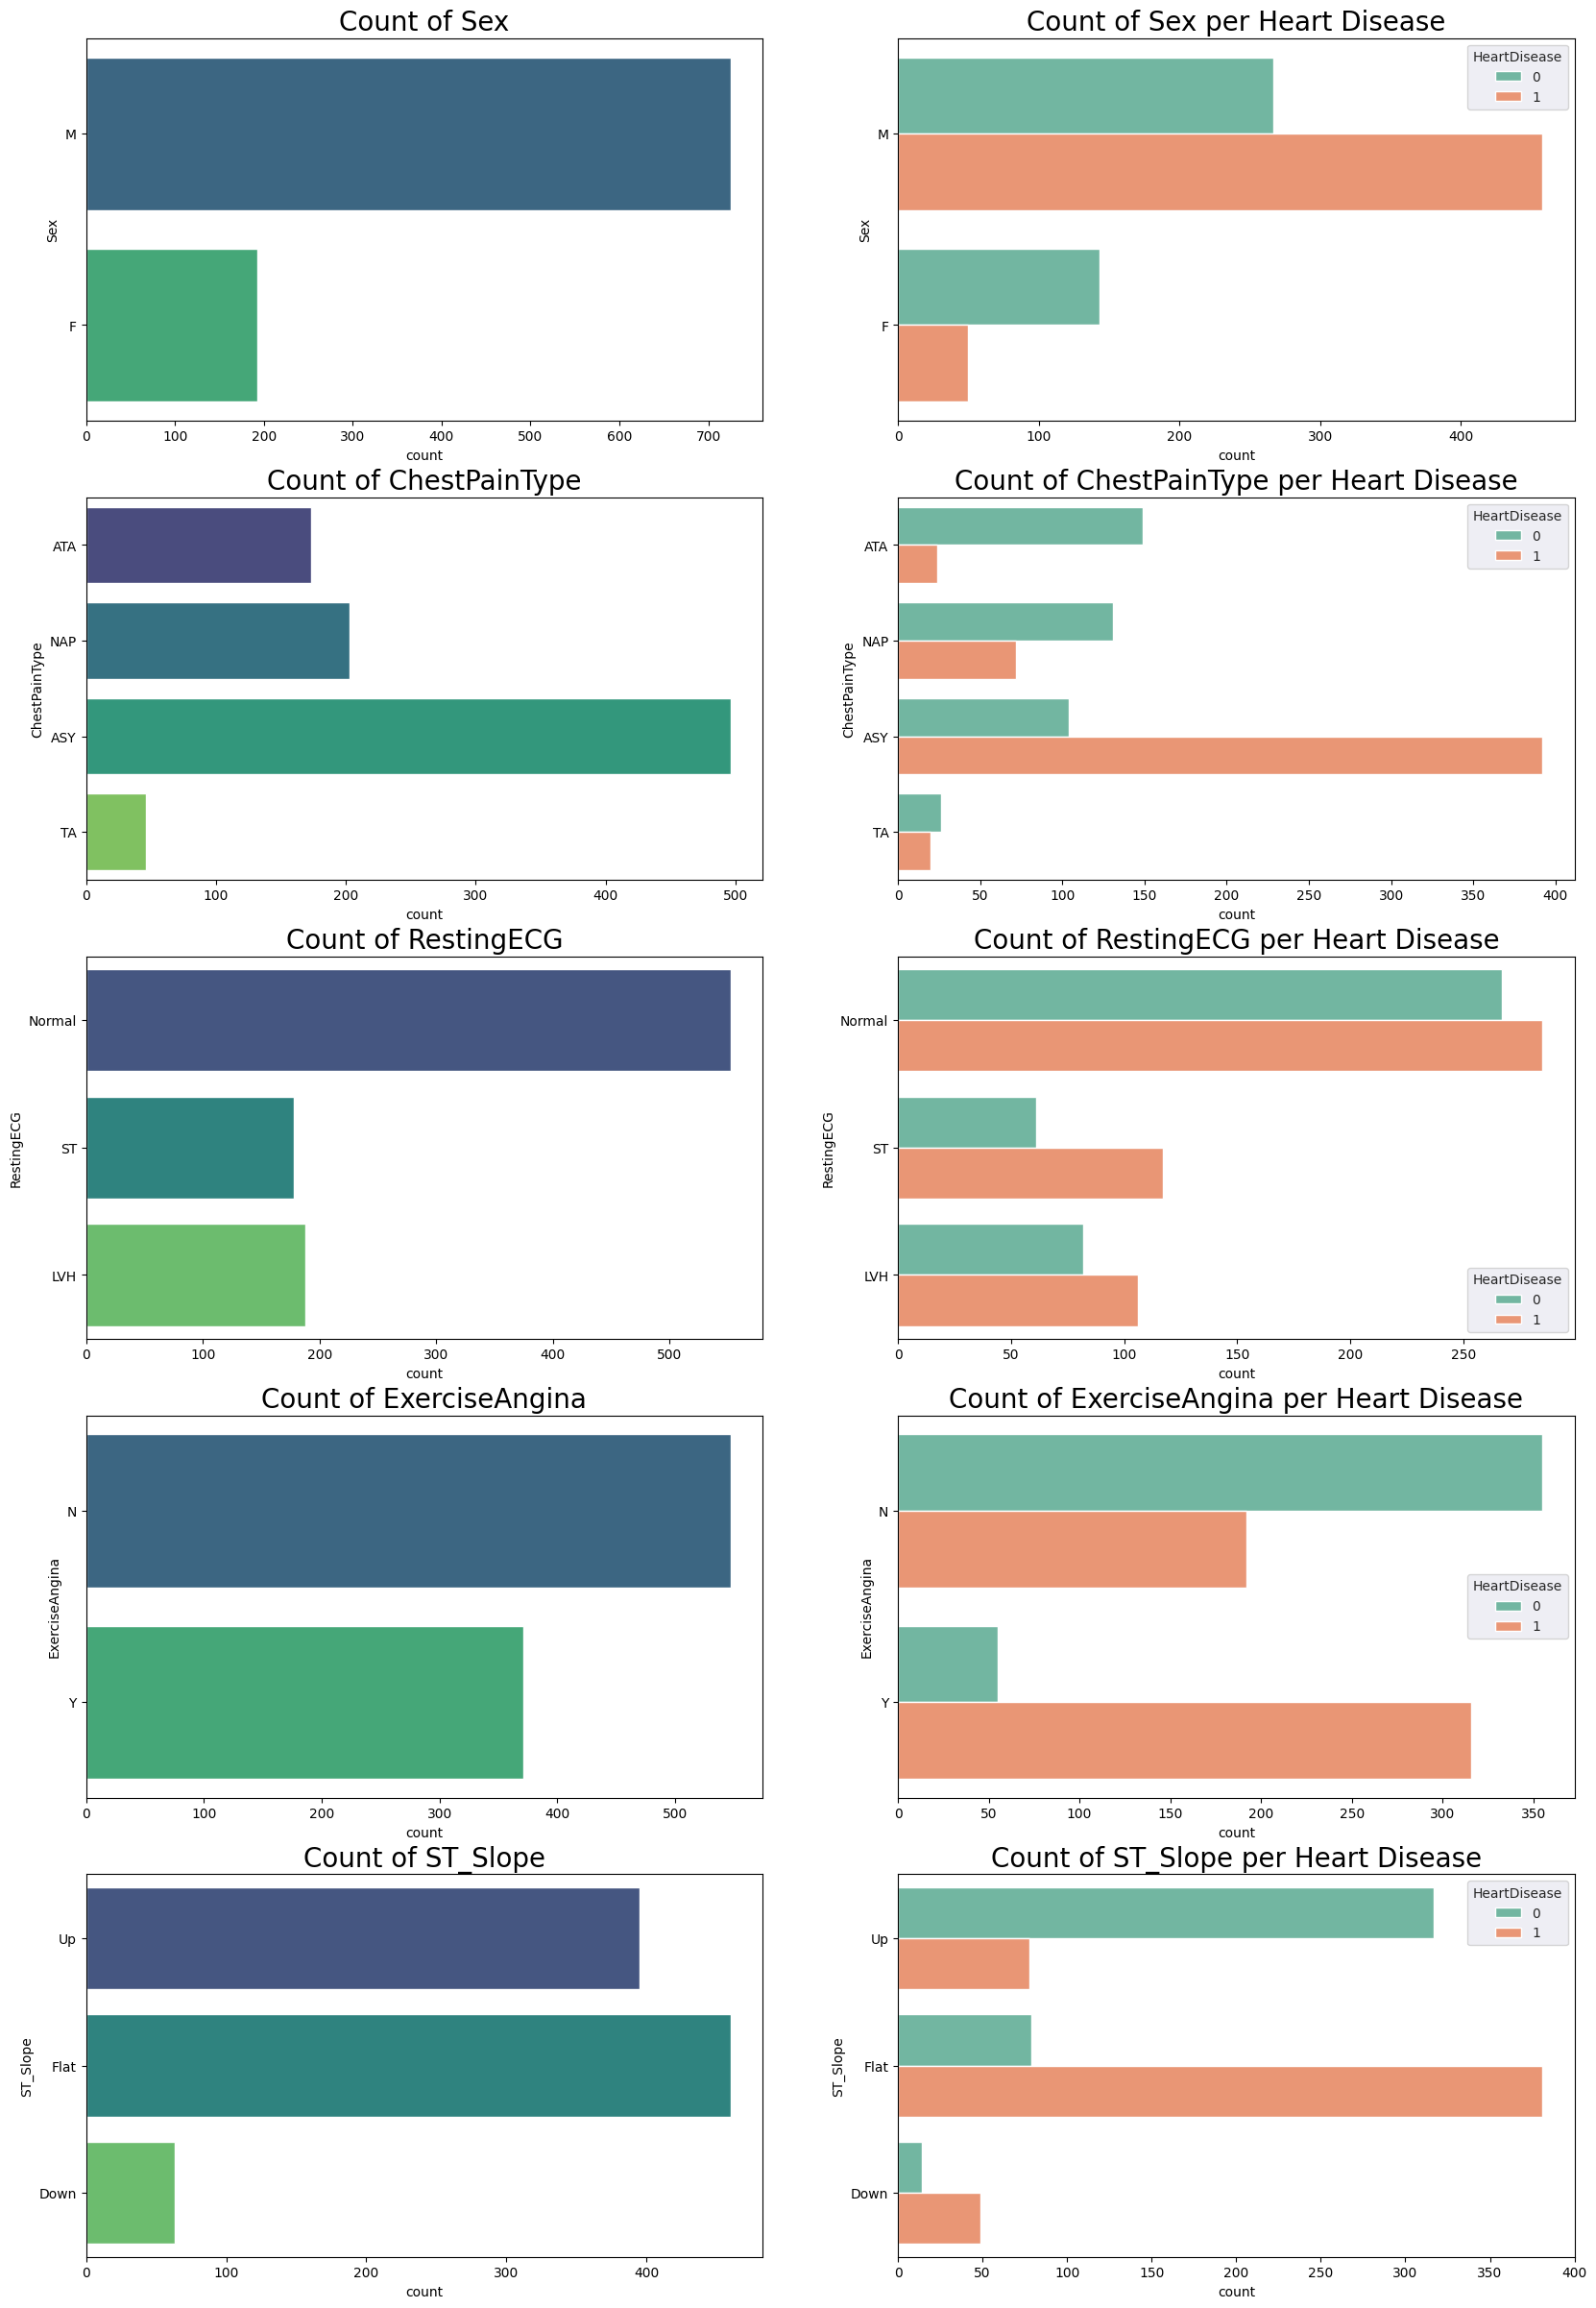

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
sns.set_style('darkgrid')
idx = 0
for col in categorical_features:
    if idx < 5:
        sns.countplot(data=data, y=col, palette='viridis', orient='h',
                      ax=axes[idx][0]).set_title(f'Count of {col}', fontsize=20)
    
    if idx < 5:    
        sns.countplot(data=data, y=col, palette='Set2', orient='h', hue='HeartDisease',
                      ax=axes[idx][1]).set_title(f'Count of {col} per Heart Disease', fontsize=20)
    
    idx += 1
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

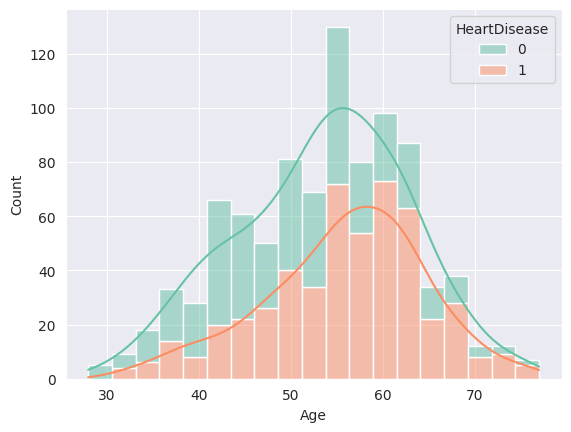

In [13]:
sns.histplot(data=data, x="Age", hue="HeartDisease", multiple="stack",palette="Set2",kde=True)

/home/elvaret/pythonenv/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


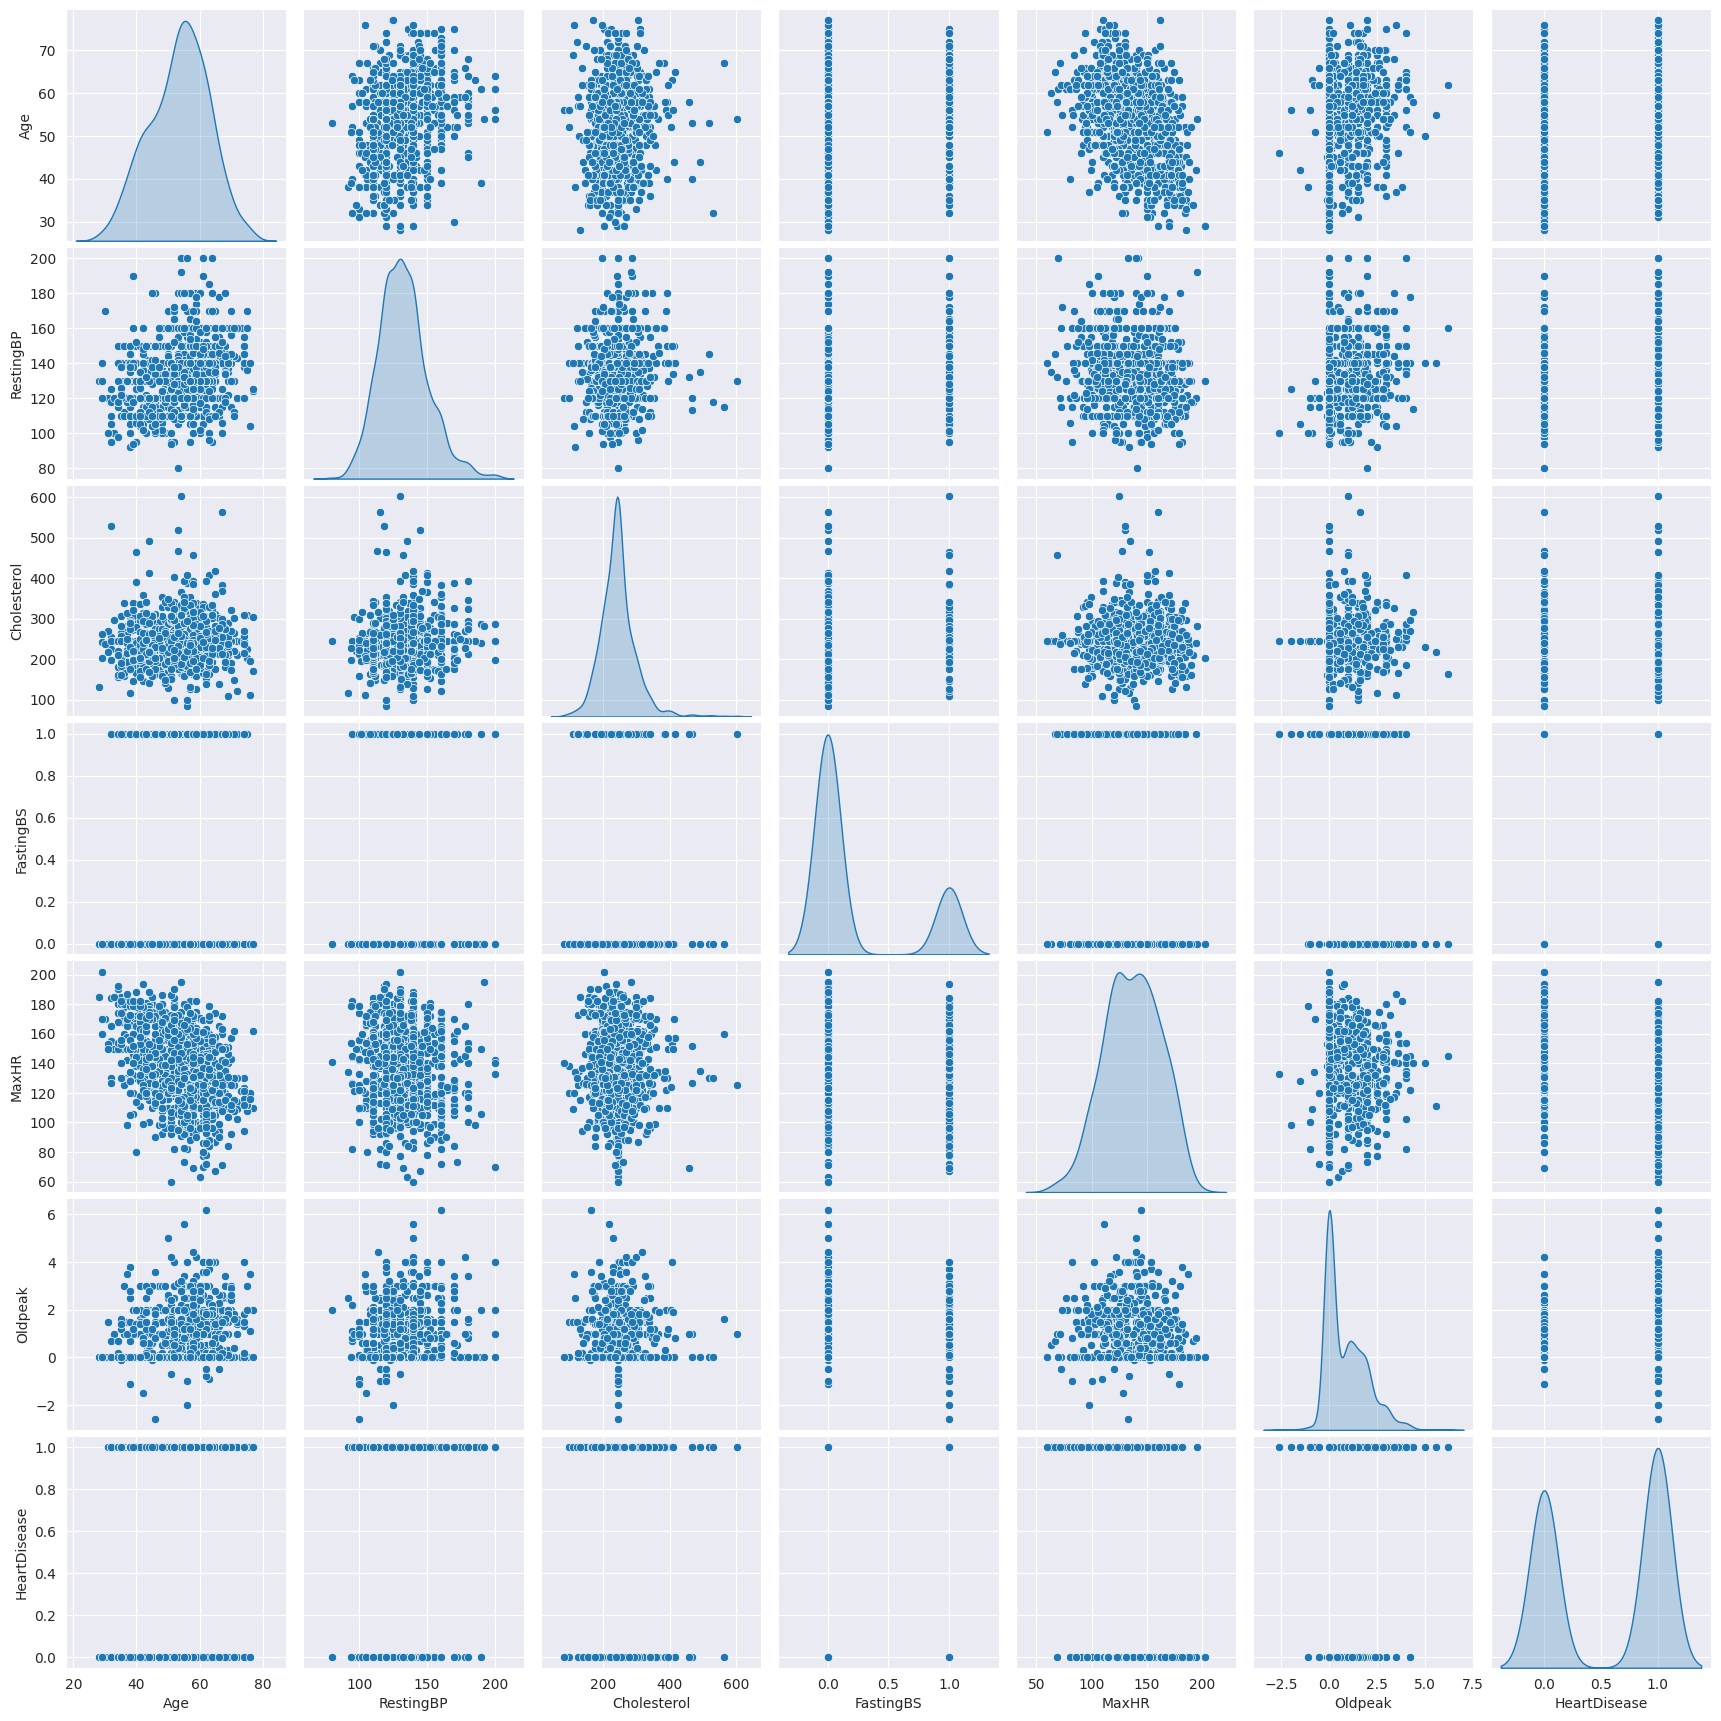

In [14]:
sns.pairplot(data, diag_kind = 'kde')

Untuk menganalisis hubungan antara variabel kategorikal dan variabel numerik atau target, lebih baik menggunakan teknik visualisasi yang sesuai. Box plot, violin plot, atau plot lainnya yang sesuai dapat memberikan wawasan tentang hubungan antara variabel kategorikal dan variabel numerik atau target dalam bentuk yang mudah dipahami.

Text(0.5, 1.0, 'Cholesterol vs HeartDisease')

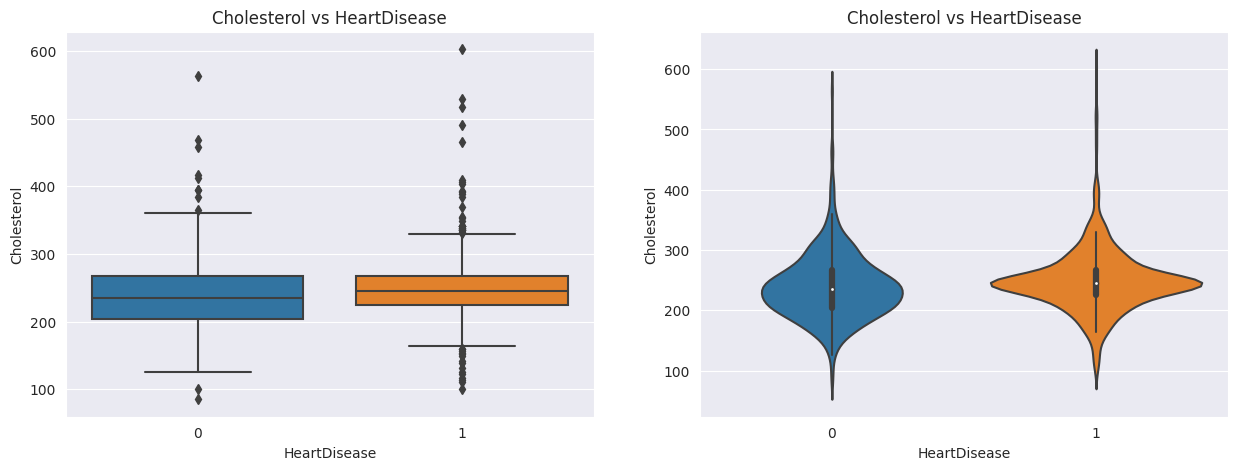

In [15]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data, ax=ax[0]).set_title('Cholesterol vs HeartDisease')
sns.violinplot(x='HeartDisease', y='Cholesterol', data=data, ax=ax[1]).set_title('Cholesterol vs HeartDisease')

Violin plot ini menunjukkan semakin tinggi nilai kolesterol, semakin tinggi juga risiko seseorang mengalami penyakit jantung. Ini berarti individu dengan kolesterol yang lebih tinggi cenderung memiliki kemungkinan lebih besar untuk mengalami penyakit jantung. Namun untuk melihat seberapa besar relasi positif antara kolestrol dengan penyakit jantung ini, kita akan memvisualiasikannya dengan Correlation Matrix.

Text(0.5, 1.0, 'MaxHR vs HeartDisease')

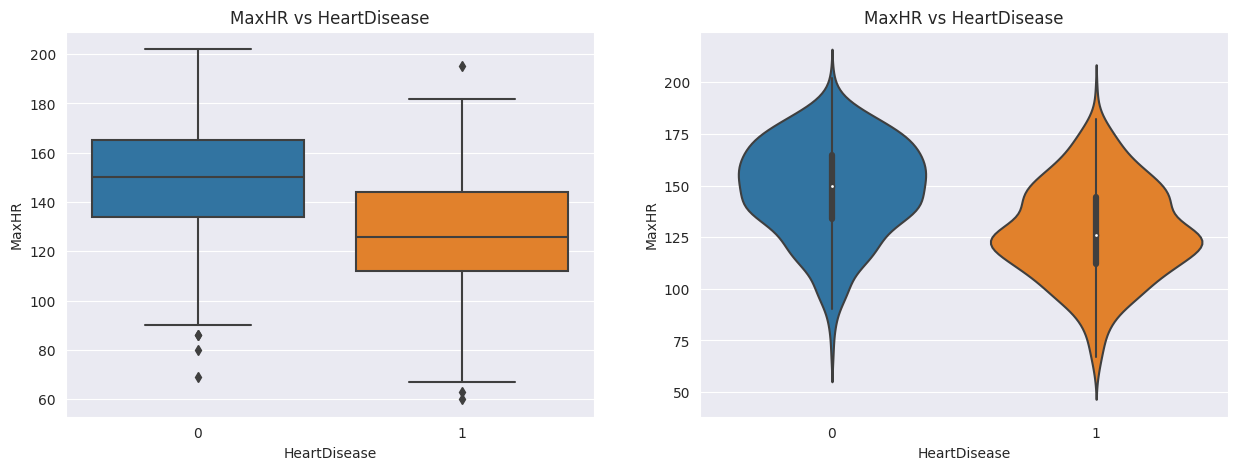

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=data, ax=ax[0]).set_title('MaxHR vs HeartDisease')
sns.violinplot(x='HeartDisease', y='MaxHR', data=data, ax=ax[1]).set_title('MaxHR vs HeartDisease')

Violin plot ini menunjukkan MaxHR(Maximum Heart Rate) berkorelasi negatif dengan HeartDisease. Ini berarti bahwa semakin tinggi nilai MaxHR, semakin rendah kemungkinan seseorang mengalami penyakit jantung. Dalam konteks ini, ada kecenderungan bahwa orang dengan detak jantung maksimal yang lebih tinggi cenderung memiliki risiko lebih rendah untuk mengalami penyakit jantung. Namun untuk melihat seberapa besar relasi negatif antara MaxHR dengan penyakit jantung ini, kita akan memvisualiasikannya dengan Correlation Matrix.

Text(0.5, 1.0, 'Correlation Matrix For Numeric Feature ')

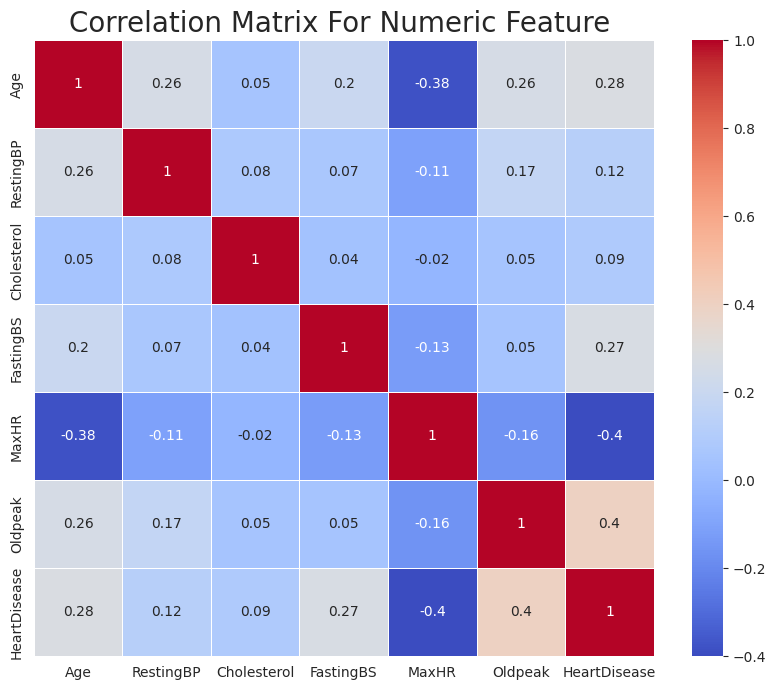

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix For Numeric Feature ", size=20)

## Data Preparation

Jika beberapa fitur tidak menunjukkan korelasi yang tinggi terhadap target atau tidak ada variasi yang signifikan dalam arah tertentu, maka penerapan PCA mungkin tidak akan memberikan manfaat yang signifikan. PCA lebih berguna saat kita memiliki fitur-fitur yang memiliki variasi tinggi dan korelasi yang tinggi sehingga dapat mengidentifikasi arah utama dari variasi dalam data. Maka dari itu kita bisa langsung menuju ke tahap selanjutnya.

In [18]:
from sklearn.preprocessing import OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['Sex'], prefix='Sex')],axis=1)
data = pd.concat([data, pd.get_dummies(data['ChestPainType'], prefix='ChestPainType')],axis=1)
data = pd.concat([data, pd.get_dummies(data['RestingECG'], prefix='RestingECG')],axis=1)
data = pd.concat([data, pd.get_dummies(data['ExerciseAngina'], prefix='ExerciseAngina')],axis=1)
data = pd.concat([data, pd.get_dummies(data['ST_Slope'], prefix='ST_Slope')],axis=1)
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], axis=1, inplace=True)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138.0,214.0,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150.0,195.0,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


#### Train-Test-Split 90:10

In [19]:
from sklearn.model_selection import train_test_split

x = data.drop(["HeartDisease"],axis=1)
y = data["HeartDisease"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=123)

In [20]:
print(f'Total of sample in whole dataset: {len(x)}')
print(f'Total of sample in train dataset: {len(x_train)}')
print(f'Total of sample in test dataset: {len(x_test)}')

Total of sample in whole dataset: 918
Total of sample in train dataset: 826
Total of sample in test dataset: 92


#### Standardization on Train Dataset

In [21]:
from sklearn.preprocessing import StandardScaler

new_numerical_features = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
scaler.fit(x_train[new_numerical_features])
x_train[new_numerical_features] = scaler.transform(x_train.loc[:, new_numerical_features])
x_train[new_numerical_features].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
602,0.794846,-0.691010,1.716694,-1.549055,-0.834934
560,0.055258,0.029557,-0.773108,-0.005797,-0.651369
370,0.689190,0.140413,0.000503,-2.934031,-0.376021
261,0.055258,-0.691010,-0.438657,0.033774,0.082893
162,-0.684330,1.526118,0.341728,1.458321,-0.834934


In [22]:
x_train[new_numerical_features].describe().round(3)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,826.000,826.000,826.000,826.000,826.000
mean,-0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001
min,-2.692,-2.908,-2.966,-3.053,-3.221
25%,-0.684,-0.691,-0.569,-0.678,-0.835
50%,0.055,-0.137,0.001,0.034,-0.284
75%,0.689,0.418,0.411,0.746,0.542
max,2.485,3.743,6.659,2.566,4.856


## Model Development

#### Pendekatan Tradisional

In [23]:
x_test.loc[:, new_numerical_features] = scaler.transform(x_test[new_numerical_features])

1). K-Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_test_pred_knn = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
f1_knn = f1_score(y_test, y_test_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_test_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print("Confusion Matrix:")
print(confusion_mat_knn)

Accuracy: 0.90
Precision: 0.89
Recall: 0.94
F1 Score: 0.91
Confusion Matrix:
[[36  6]
 [ 3 47]]


In [120]:
y_train_pred_knn = knn.predict(x_train)

accuracy_rf = accuracy_score(y_train, y_train_pred_knn)
precision_rf = precision_score(y_train, y_train_pred_knn)
recall_rf = recall_score(y_train, y_train_pred_knn)
f1_rf = f1_score(y_train, y_train_pred_knn)
confusion_mat_rf = confusion_matrix(y_train, y_train_pred_knn)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("Confusion Matrix:")
print(confusion_mat_rf)

Accuracy: 0.88
Precision: 0.88
Recall: 0.90
F1 Score: 0.89
Confusion Matrix:
[[314  54]
 [ 44 414]]


2). Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
 
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
y_test_pred_rf = RF.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_test_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("Confusion Matrix:")
print(confusion_mat_rf)

Accuracy: 0.86
Precision: 0.82
Recall: 0.94
F1 Score: 0.88
Confusion Matrix:
[[32 10]
 [ 3 47]]


In [121]:
y_train_pred_rf = RF.predict(x_train)

accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
precision_rf = precision_score(y_train, y_train_pred_rf)
recall_rf = recall_score(y_train, y_train_pred_rf)
f1_rf = f1_score(y_train, y_train_pred_rf)
confusion_mat_rf = confusion_matrix(y_train, y_train_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("Confusion Matrix:")
print(confusion_mat_rf)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[368   0]
 [  0 458]]


Another Traditional Model From LazyClassifier Library

In [33]:
from lazypredict.Supervised import LazyClassifier 
from sklearn.metrics import accuracy_score

def custom_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

classification = LazyClassifier(verbose=1 , ignore_warnings=True , custom_metric=custom_accuracy)

In [34]:
models1 , predictions = classification.fit(x_train , x_test , y_train , y_test)

  3%|▎         | 1/29 [00:00<00:04,  6.68it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7391304347826086, 'Balanced Accuracy': 0.7333333333333334, 'ROC AUC': 0.7333333333333334, 'F1 Score': 0.7376254180602007, 'custom_accuracy': 0.7391304347826086, 'Time taken': 0.1493701934814453}
{'Model': 'BaggingClassifier', 'Accuracy': 0.7717391304347826, 'Balanced Accuracy': 0.7690476190476191, 'ROC AUC': 0.7690476190476192, 'F1 Score': 0.7714940692602524, 'custom_accuracy': 0.7717391304347826, 'Time taken': 0.0582430362701416}
{'Model': 'BernoulliNB', 'Accuracy': 0.7391304347826086, 'Balanced Accuracy': 0.7295238095238095, 'ROC AUC': 0.7295238095238095, 'F1 Score': 0.7350622934146961, 'custom_accuracy': 0.7391304347826086, 'Time taken': 0.016268014907836914}


 14%|█▍        | 4/29 [00:00<00:02, 11.24it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.7490476190476192, 'F1 Score': 0.7502079619726679, 'custom_accuracy': 0.75, 'Time taken': 0.14882993698120117}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6195652173913043, 'Balanced Accuracy': 0.6157142857142857, 'ROC AUC': 0.6157142857142858, 'F1 Score': 0.6191567821004207, 'custom_accuracy': 0.6195652173913043, 'Time taken': 0.019101619720458984}
{'Model': 'DummyClassifier', 'Accuracy': 0.5434782608695652, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.38273116962645437, 'custom_accuracy': 0.5434782608695652, 'Time taken': 0.019291162490844727}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.6304347826086957, 'Balanced Accuracy': 0.6276190476190476, 'ROC AUC': 0.6276190476190476, 'F1 Score': 0.6304347826086957, 'custom_accuracy': 0.6304347826086957, 'Time taken': 0.020661354064941406}


 41%|████▏     | 12/29 [00:00<00:00, 18.13it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.7490476190476192, 'F1 Score': 0.7502079619726679, 'custom_accuracy': 0.75, 'Time taken': 0.18811488151550293}
{'Model': 'GaussianNB', 'Accuracy': 0.782608695652174, 'Balanced Accuracy': 0.7828571428571429, 'ROC AUC': 0.7828571428571429, 'F1 Score': 0.7829182229008893, 'custom_accuracy': 0.782608695652174, 'Time taken': 0.018797874450683594}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.6956521739130435, 'Balanced Accuracy': 0.6914285714285715, 'ROC AUC': 0.6914285714285714, 'F1 Score': 0.6949244172748633, 'custom_accuracy': 0.6956521739130435, 'Time taken': 0.02094554901123047}
{'Model': 'LabelPropagation', 'Accuracy': 0.717391304347826, 'Balanced Accuracy': 0.7152380952380952, 'ROC AUC': 0.7152380952380952, 'F1 Score': 0.717391304347826, 'custom_accuracy': 0.717391304347826, 'Time taken': 0.07546162605285645}


 48%|████▊     | 14/29 [00:00<00:01, 13.80it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.717391304347826, 'Balanced Accuracy': 0.7152380952380952, 'ROC AUC': 0.7152380952380952, 'F1 Score': 0.717391304347826, 'custom_accuracy': 0.717391304347826, 'Time taken': 0.10948467254638672}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.7490476190476192, 'F1 Score': 0.7502079619726679, 'custom_accuracy': 0.75, 'Time taken': 0.13433241844177246}
{'Model': 'LinearSVC', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.7490476190476192, 'F1 Score': 0.7502079619726679, 'custom_accuracy': 0.75, 'Time taken': 0.049955129623413086}


 62%|██████▏   | 18/29 [00:01<00:00, 17.45it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.7490476190476192, 'F1 Score': 0.7502079619726679, 'custom_accuracy': 0.75, 'Time taken': 0.022504091262817383}
{'Model': 'NearestCentroid', 'Accuracy': 0.7391304347826086, 'Balanced Accuracy': 0.7371428571428571, 'ROC AUC': 0.7371428571428571, 'F1 Score': 0.7391304347826086, 'custom_accuracy': 0.7391304347826086, 'Time taken': 0.025426149368286133}
{'Model': 'NuSVC', 'Accuracy': 0.7282608695652174, 'Balanced Accuracy': 0.729047619047619, 'ROC AUC': 0.729047619047619, 'F1 Score': 0.7287438754849379, 'custom_accuracy': 0.7282608695652174, 'Time taken': 0.04613828659057617}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6956521739130435, 'Balanced Accuracy': 0.6990476190476191, 'ROC AUC': 0.6990476190476191, 'F1 Score': 0.6960838729571385, 'custom_accuracy': 0.6956521739130435, 'Time taken': 0.023834705352783203}
{'Model': 'Perceptron', 'Accuracy': 0.5869565217391305, 'Balanced 

 90%|████████▉ | 26/29 [00:01<00:00, 18.24it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7608695652173914, 'Balanced Accuracy': 0.7609523809523809, 'ROC AUC': 0.7609523809523809, 'F1 Score': 0.7612100451909782, 'custom_accuracy': 0.7608695652173914, 'Time taken': 0.23881912231445312}
{'Model': 'RidgeClassifier', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.7490476190476192, 'F1 Score': 0.7502079619726679, 'custom_accuracy': 0.75, 'Time taken': 0.03109002113342285}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.7490476190476192, 'F1 Score': 0.7502079619726679, 'custom_accuracy': 0.75, 'Time taken': 0.028954267501831055}
{'Model': 'SGDClassifier', 'Accuracy': 0.6956521739130435, 'Balanced Accuracy': 0.6971428571428572, 'ROC AUC': 0.6971428571428573, 'F1 Score': 0.6962285902503295, 'custom_accuracy': 0.6956521739130435, 'Time taken': 0.022838115692138672}
{'Model': 'SVC', 'Accuracy': 0.75, 'Balanced Accuracy': 0.7490476190476191, 'ROC AUC': 0.74

100%|██████████| 29/29 [00:02<00:00, 10.66it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.6630434782608695, 'Balanced Accuracy': 0.6576190476190475, 'ROC AUC': 0.6576190476190475, 'F1 Score': 0.6617106764848428, 'custom_accuracy': 0.6630434782608695, 'Time taken': 1.024942398071289}
[LightGBM] [Info] Number of positive: 458, number of negative: 368
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 826, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554479 -> initscore=0.218786
[LightGBM] [Info] Start training from score 0.218786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [36]:
models1.rename(columns={'custom_accuracy': 'accuracy_score'}, inplace=True)
pd.DataFrame(models1)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,accuracy_score,Time Taken
Model,,,,,,
GaussianNB,0.78,0.78,0.78,0.78,0.78,0.02
QuadraticDiscriminantAnalysis,0.77,0.78,0.78,0.77,0.77,0.04
BaggingClassifier,0.77,0.77,0.77,0.77,0.77,0.06
RandomForestClassifier,0.76,0.76,0.76,0.76,0.76,0.24
LinearSVC,0.75,0.75,0.75,0.75,0.75,0.05
SVC,0.75,0.75,0.75,0.75,0.75,0.05
CalibratedClassifierCV,0.75,0.75,0.75,0.75,0.75,0.15
RidgeClassifierCV,0.75,0.75,0.75,0.75,0.75,0.03
RidgeClassifier,0.75,0.75,0.75,0.75,0.75,0.03


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_test_pred_gnb = gnb.predict(x_test)

accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)
precision_gnb = precision_score(y_test, y_test_pred_gnb)
recall_gnb = recall_score(y_test, y_test_pred_gnb)
f1_gnb = f1_score(y_test, y_test_pred_gnb)
confusion_mat_gnb = confusion_matrix(y_test, y_test_pred_gnb)

print(f"Accuracy: {accuracy_gnb:.2f}")
print(f"Precision: {precision_gnb:.2f}")
print(f"Recall: {recall_gnb:.2f}")
print(f"F1 Score: {f1_gnb:.2f}")
print("Confusion Matrix:")
print(confusion_mat_gnb)

Accuracy: 0.87
Precision: 0.84
Recall: 0.94
F1 Score: 0.89
Confusion Matrix:
[[33  9]
 [ 3 47]]


In [122]:
y_train_pred_gnb = gnb.predict(x_train)

accuracy_rf = accuracy_score(y_train, y_train_pred_gnb)
precision_rf = precision_score(y_train, y_train_pred_gnb)
recall_rf = recall_score(y_train, y_train_pred_gnb)
f1_rf = f1_score(y_train, y_train_pred_gnb)
confusion_mat_rf = confusion_matrix(y_train, y_train_pred_gnb)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("Confusion Matrix:")
print(confusion_mat_rf)

Accuracy: 0.85
Precision: 0.88
Recall: 0.85
F1 Score: 0.87
Confusion Matrix:
[[315  53]
 [ 67 391]]


#### Pendekatan Neural Network

In [88]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64 , activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128 , activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256 , activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1 , activation = "sigmoid"),
])

In [89]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
earlystopping = EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=2,
                                        patience=20)

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 64)                1344      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dropout_12 (Dropout)        (None, 256)              

Perbedaan tipe data pada kolom-kolom dapat menyebabkan masalah saat dilakukan operasi seperti .flatten(), terutama jika kita mencoba mengonversi hasilnya ke dalam tensor TensorFlow. TensorFlow cenderung lebih ketat dalam hal tipe data dan struktur.

Untuk mengatasi masalah ini, pastikan bahwa kita memiliki konsistensi tipe data dalam kolom-kolom yang kita gunakan, terutama jika kita melakukan operasi seperti .flatten() atau mengonversi data ke dalam tensor TensorFlow. Kita dapat mengonversi tipe data kolom-kolom menjadi tipe data yang sesuai sebelum melakukan operasi tersebut. Dari dataset kita, hanya kolom Oldpeak yang memiliki tipe data float. 

Jika nilai "Oldpeak" yang semula dalam tipe data float dan kita mengubahnya menjadi tipe data int secara manual, ini bisa mempengaruhi hasil pelatihan dan evaluasi model. Karena nilai "Oldpeak" yang mengandung informasi desimal menjadi diskret (tanpa desimal) sebagai tipe data int, maka informasi perubahan detil dalam segmen ST pada EKG mungkin akan hilang. Oleh karena itu, kita akan mengubah semua kolom ke float.

Pengubahan tipe data menjadi float tidak akan mengubah cara model memperlakukan nilai-nilai tersebut. Model akan mengekstrak pola dari data dan mencoba menghubungkan fitur-fitur ini dengan target yang relevan, tanpa mempedulikan apakah nilai-nilai tersebut awalnya adalah int atau float. Model akan mengadaptasi dirinya untuk bekerja dengan jenis data ini dan tidak akan memiliki masalah dalam memahami bahwa nilai-nilai ini mewakili kondisi biner (misalnya, ya/tidak, 1/0, on/off).

In [46]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [97]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, callbacks=[earlystopping])

Epoch 1/50
13/13 [==============================] - 0s 12ms/step - loss: 0.1860 - accuracy: 0.9165 - val_loss: 0.3979 - val_accuracy: 0.8696
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1789 - accuracy: 0.9310 - val_loss: 0.4229 - val_accuracy: 0.8696
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1968 - accuracy: 0.9213 - val_loss: 0.3855 - val_accuracy: 0.8696
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1895 - accuracy: 0.9165 - val_loss: 0.3985 - val_accuracy: 0.8804
Epoch 5/50
13/13 [==============================] - 0s 8ms/step - loss: 0.1725 - accuracy: 0.9249 - val_loss: 0.3955 - val_accuracy: 0.8804
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1748 - accuracy: 0.9322 - val_loss: 0.4479 - val_accuracy: 0.8696
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1899 - accuracy: 0.9189 - val_loss: 0.4027 - val_accuracy: 0.8913
Epoch 8/50
13/13 [=

In [99]:
model.evaluate(x_test  ,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8804


[0.42830029129981995, 0.8804348111152649]

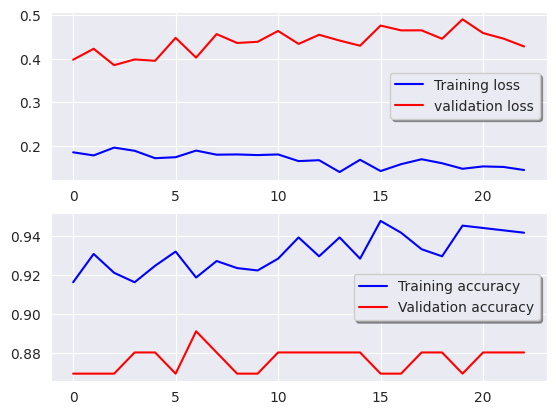

In [100]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [55]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary.reshape(92)

3/3 [==============================] - 0s 2ms/step


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

In [56]:
ann_cm = confusion_matrix(y_test, y_pred_binary)
ann_acc = round(accuracy_score(y_pred_binary,y_test) * 100, 2)
print(ann_cm)
print(ann_acc,'%')

[[35  7]
 [ 3 47]]
89.13 %


In [101]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate F1 Score
f1_ann = f1_score(y_test, y_pred_binary)

# Calculate Precision
precision_ann = precision_score(y_test, y_pred_binary)

# Calculate Recall
recall_ann = recall_score(y_test, y_pred_binary)

# Print the metrics
print("F1 Score:", f1_ann)
print("Precision:", precision_ann)
print("Recall:", recall_ann)
print("Accuracy:", ann_acc, "%")

F1 Score: 0.9038461538461539
Precision: 0.8703703703703703
Recall: 0.94
Accuracy: 89.13 %


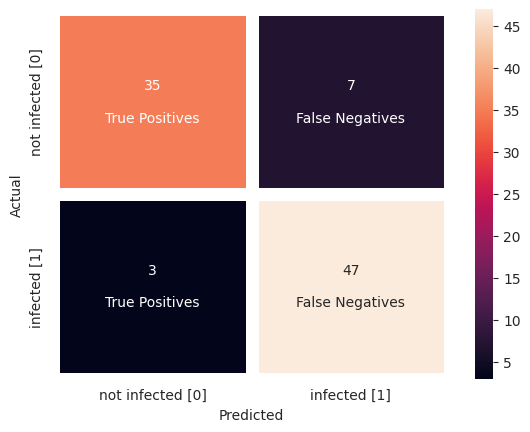

In [57]:
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in ann_cm])
status = ["not infected [0]" , "infected [1]"]

ax = sns.heatmap(ann_cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status )

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [103]:
def print_score(test, pred, model):
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    sns.heatmap(confusion_matrix(test, pred), annot=True, cmap='Blues', ax=ax[0])
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    ax = sns.distplot(test, color='r',  label='Actual Value',hist=False)
    sns.distplot(pred, color='b', label='Predicted Value',hist=False,ax=ax)
    plt.title(f'Actual vs Predicted Value {model}')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.show()
    Metrics = {'Metrics':['Accuracy Score', 'Precision Score', 'Recall Score','F1 Score'],
               'Score' : [accuracy_score(test, pred), precision_score(test, pred), recall_score(test, pred), 
                          f1_score(test, pred, average="weighted")]}
    df = pd.DataFrame(Metrics)
    return df

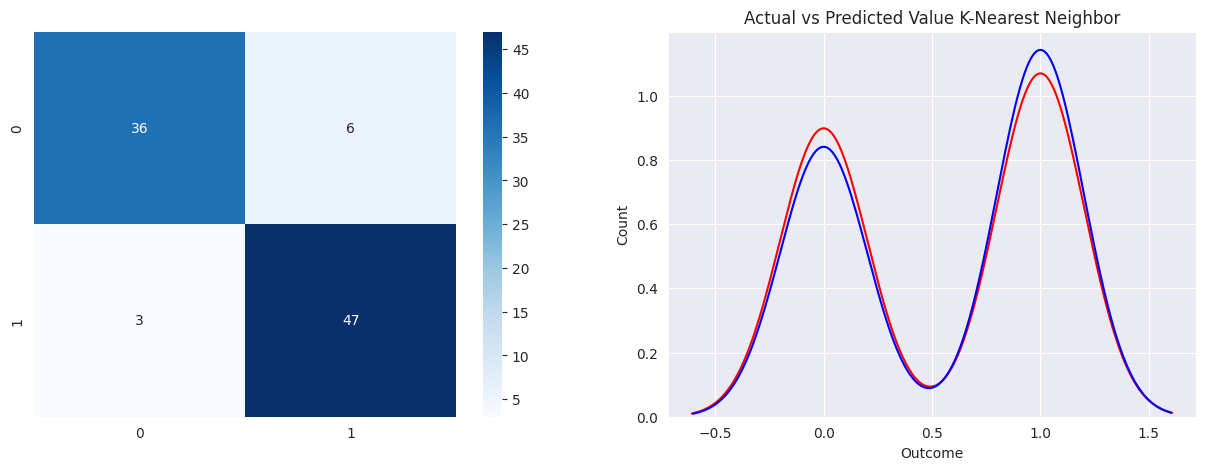

,Metrics,Score
0,Accuracy Score,0.90
1,Precision Score,0.89
2,Recall Score,0.94
3,F1 Score,0.90


In [104]:
print_score(y_test, y_test_pred_knn, 'K-Nearest Neighbor')

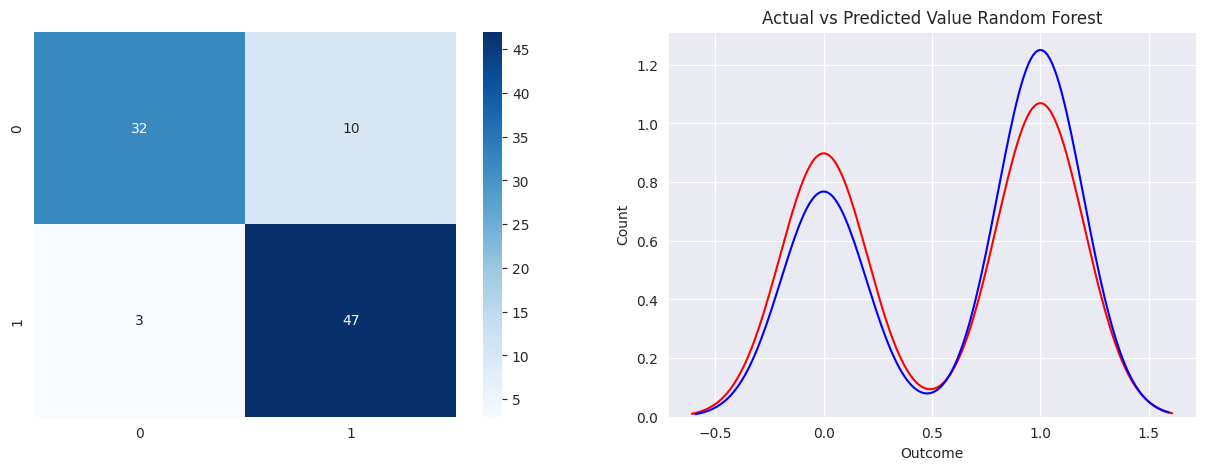

,Metrics,Score
0,Accuracy Score,0.86
1,Precision Score,0.82
2,Recall Score,0.94
3,F1 Score,0.86


In [105]:
print_score(y_test, y_test_pred_rf, 'Random Forest')

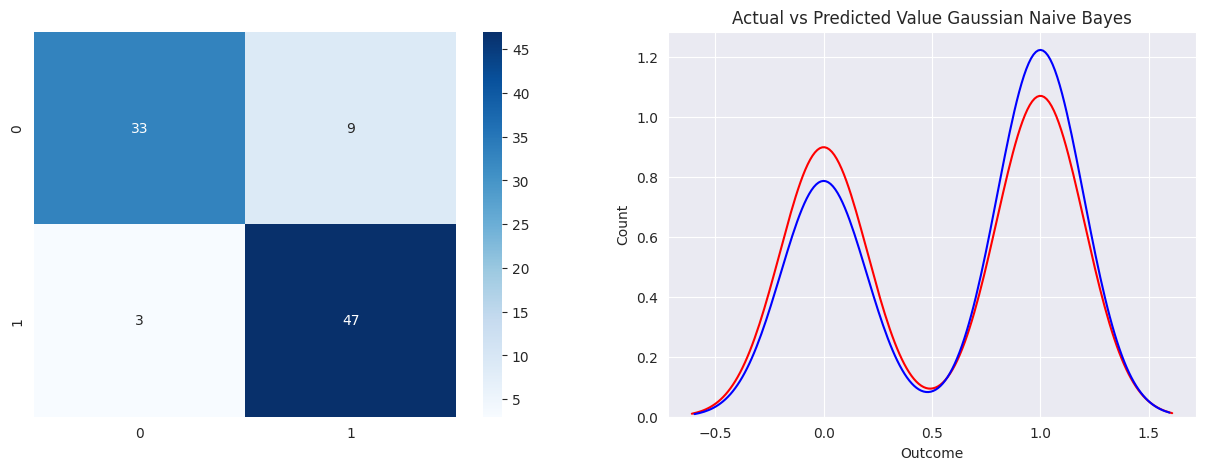

,Metrics,Score
0,Accuracy Score,0.87
1,Precision Score,0.84
2,Recall Score,0.94
3,F1 Score,0.87


In [106]:
print_score(y_test, y_test_pred_gnb, 'Gaussian Naive Bayes')

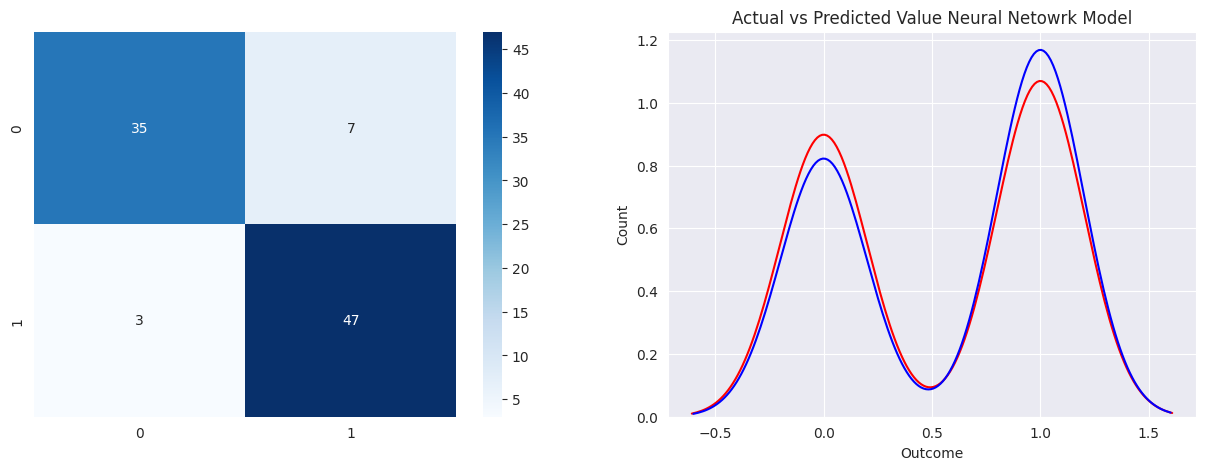

,Metrics,Score
0,Accuracy Score,0.89
1,Precision Score,0.87
2,Recall Score,0.94
3,F1 Score,0.89


In [107]:
print_score(y_test, y_pred_binary, 'Neural Netowrk Model')

### Perbandingan antara Pendekatan Tradisional dan Neural Network

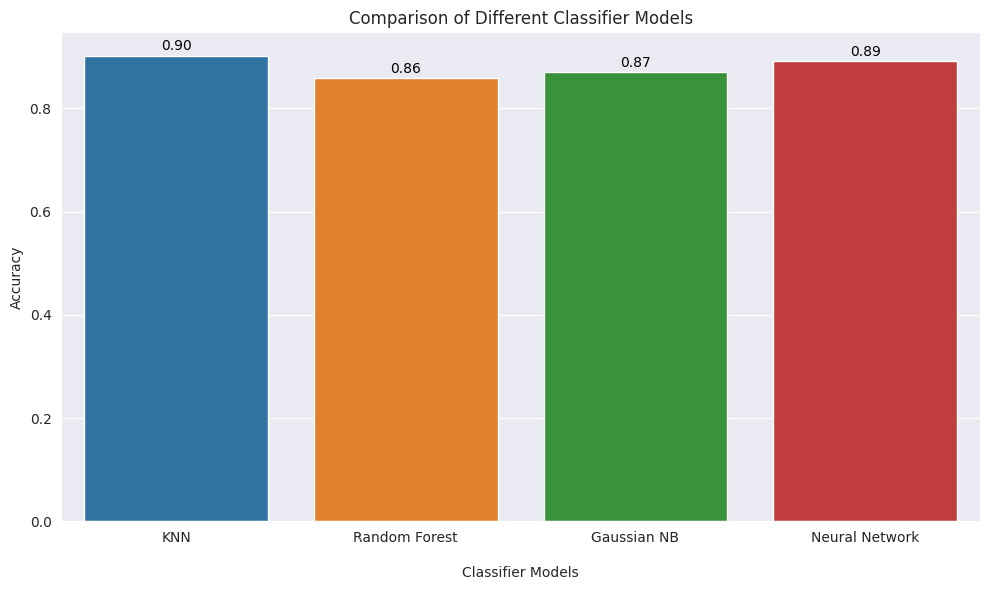

In [116]:
models = ['KNN', 'Random Forest', 'Gaussian NB', 'Neural Network']
preds = [y_test_pred_knn, y_test_pred_rf, y_test_pred_gnb, y_pred_binary]
accuracys = [accuracy_score(y_test, pred) for pred in preds]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=models, y=accuracys)
plt.xlabel('Classifier Models', labelpad=15)  
plt.ylabel('Accuracy')
plt.title('Comparison of Different Classifier Models')

for index, value in enumerate(accuracys):
    barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()